In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
path = 'C:\\Users\\SandeepMerutha\\Desktop\\rkaftermidsem-code\\Untitled Folder\\expallreading-solar-cell1.csv'
data = pd.read_csv(path, skiprows=2)
data.head()

,V,I,Unnamed: 2,V.1,I.1,Unnamed: 5,V.2,I.2,Unnamed: 8,V.3,...,I.8,Unnamed: 26,V.9,I.9,Unnamed: 29,V.10,I.10,Unnamed: 32,V.11,I.11
0,3.5,0.54,NaN,3.5,0.58,NaN,3.5,0.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,0.54,NaN,4.0,0.58,NaN,4.0,0.60,NaN,4.0,...,0.61,NaN,4.5,0.64,NaN,3.7,0.55,NaN,1.65,0.25
2,5.0,0.54,NaN,5.0,0.58,NaN,5.0,0.59,NaN,5.0,...,0.61,NaN,5.0,0.63,NaN,3.9,0.53,NaN,1.70,0.22
3,6.0,0.54,NaN,6.0,0.57,NaN,6.0,0.59,NaN,6.0,...,0.60,NaN,5.5,0.62,NaN,4.1,0.48,NaN,1.75,0.19
4,7.0,0.53,NaN,7.0,0.57,NaN,7.0,0.59,NaN,7.0,...,0.59,NaN,6.0,0.62,NaN,4.3,0.44,NaN,1.80,0.16


In [4]:
features_to_remove = ['Unnamed: {}'.format(i) for i in range(2,35,3)]
data = data.drop(features_to_remove, axis=1)
data.head()


,V,I,V.1,I.1,V.2,I.2,V.3,I.3,V.4,I.4,...,V.7,I.7,V.8,I.8,V.9,I.9,V.10,I.10,V.11,I.11
0,3.5,0.54,3.5,0.58,3.5,0.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,0.54,4.0,0.58,4.0,0.60,4.0,0.67,4.0,0.58,...,4.0,0.59,4.0,0.61,4.5,0.64,3.7,0.55,1.65,0.25
2,5.0,0.54,5.0,0.58,5.0,0.59,5.0,0.67,5.0,0.58,...,5.0,0.59,5.0,0.61,5.0,0.63,3.9,0.53,1.70,0.22
3,6.0,0.54,6.0,0.57,6.0,0.59,6.0,0.66,6.0,0.57,...,6.0,0.58,6.0,0.60,5.5,0.62,4.1,0.48,1.75,0.19
4,7.0,0.53,7.0,0.57,7.0,0.59,7.0,0.66,7.0,0.57,...,7.0,0.58,7.0,0.59,6.0,0.62,4.3,0.44,1.80,0.16


In [25]:
V = ['V.{}'.format(i) for i in range(1,10)]
V.append('V')
I = ['I.{}'.format(i) for i in range(1,10)]
I.append('I')


In [26]:
def fun(x,y,d):
    coef = np.polyfit(x,y,d)
    poly = np.poly1d(coef)
    yhat = poly(x)
    return yhat

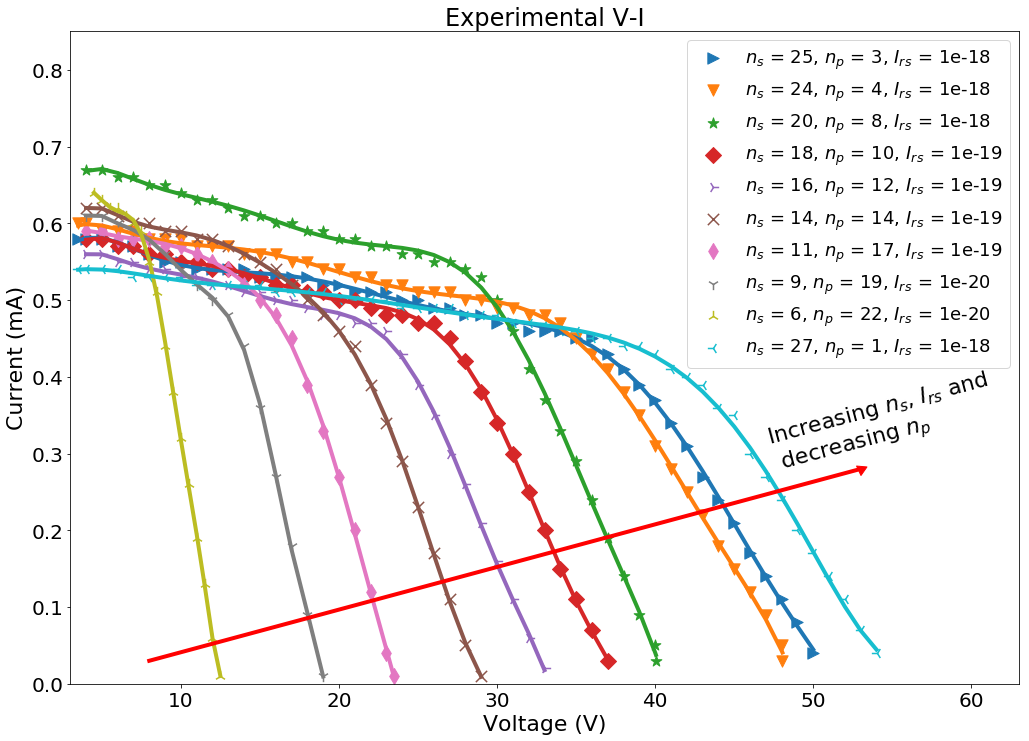

In [33]:
markers = ['>','v','*','D','4','x','d','1','2','3','|','P']
Np = np.array([3,4,8,10,12,14,17,19,22,1])
ns = np.array([25,24,20,18,16,14,11,9,6,27])
Irs = np.array([1e-18,1e-18,1e-18,1e-19,1e-19,1e-19,1e-19,1e-20,1e-20,1e-18])

x_label = [8.0, 53.0]
y_label = [0.03, 0.28]
text_cord = [47.0, 0.35]

fig, ax = plt.subplots(figsize=(17,12))
for k,(i,j) in enumerate(zip(V,I)):
    x = data[i].dropna().values
    y = data[j].dropna().values
    yhat = fun(x,y,8)
    ax.plot(x,yhat,linewidth=4)
      #ax.plot(x,yhat,c='b')
    ax.scatter(x,y,marker=markers[k],s=2**7, label='$n_s$ = {}, $n_p$ = {}, $I_r$$_s$ = {}'.format(ns[k],Np[k],Irs[k]))
    ax.set_ylim(0,0.85)
    ax.set_xlim(3,63)


ax.plot(x_label, y_label,linewidth=4,c='red')  
ax.scatter(x_label[1], y_label[1],marker = (3,0, (135+180-20)), s=145,c='red')
ax.text(text_cord[0], text_cord[1] , "Increasing $n_s$, $I_{rs}$ and\n decreasing $n_p$",rotation=15,fontsize=22)
    
plt.legend(loc=1, prop={'size': 18.0})    
plt.xlabel('Voltage (V)', fontsize=22)

plt.ylabel('Current (mA)',fontsize=22)

plt.title('Experimental V-I', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
fig.savefig('rkExperimentalrk V-I.png')

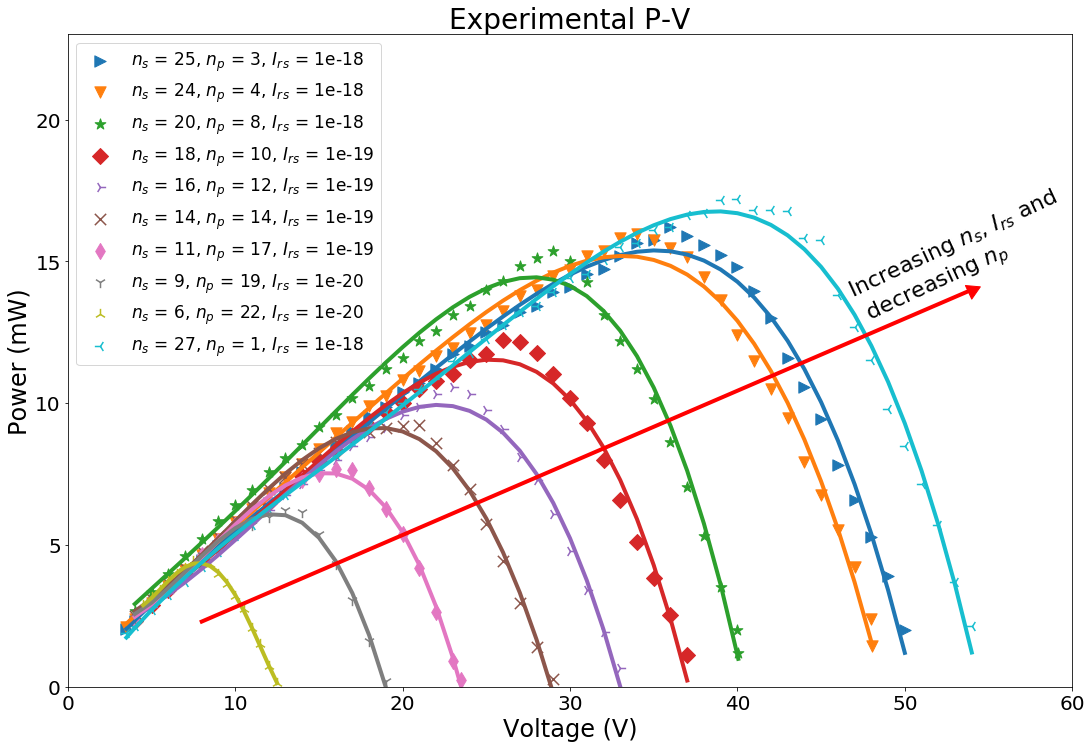

In [31]:
markers = ['>','v','*','D','4','x','d','1','2','3','|','P']
Np = np.array([3,4,8,10,12,14,17,19,22,1])
ns = np.array([25,24,20,18,16,14,11,9,6,27])
Irs = np.array([1e-18,1e-18,1e-18,1e-19,1e-19,1e-19,1e-19,1e-20,1e-20,1e-18])

x_label = [8.0, 54.0]
y_label = [2.3, 14.0]
text_cord = [46.5, 16.0]


fig, ax = plt.subplots(figsize=(18,12))
for k,(i,j) in enumerate(zip(V,I)):
    voltage = data[i].dropna().values
    current = data[j].dropna().values
    power = current*voltage
    yhat = fun(voltage,power,4)
    ax.plot(voltage,yhat,linewidth=4)
    ax.scatter(voltage,power,marker = markers[k],s = 2**7 ,label='$n_s$ = {}, $n_p$ = {}, $I_r$$_s$ = {}'.format(ns[k],Np[k],Irs[k]))
    ax.set_ylim(0,23)
    ax.set_xlim(0.0,60)

ax.plot(x_label, y_label,linewidth=4,c='red')  
ax.scatter(x_label[1], y_label[1],marker = (3,0, (135+180-20)), s=300,c='red')
ax.text(text_cord[0], text_cord[1] , "Increasing $n_s$, $I_{rs}$ and\n decreasing $n_p$",rotation=25,fontsize=22)
    
plt.legend(loc=2, prop={'size': 17})     
plt.xlabel('Voltage (V)', fontsize=24)
plt.ylabel('Power (mW)',fontsize=24)

plt.title('Experimental P-V', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
fig.savefig('rkExperimentalrk P-V.png')
